### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [6]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Onli

### Data Analysis 

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### Checking Null Values

In [10]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Dropping unnecessary columns 

In [11]:
df.drop(['ID','ZIP Code'], axis = 1, inplace = True)

In [12]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [13]:
# 5 number summary 

import plotly.express as ps

In [16]:
fig = ps.box(df, y = ['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

In [17]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [19]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

### Plotting

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

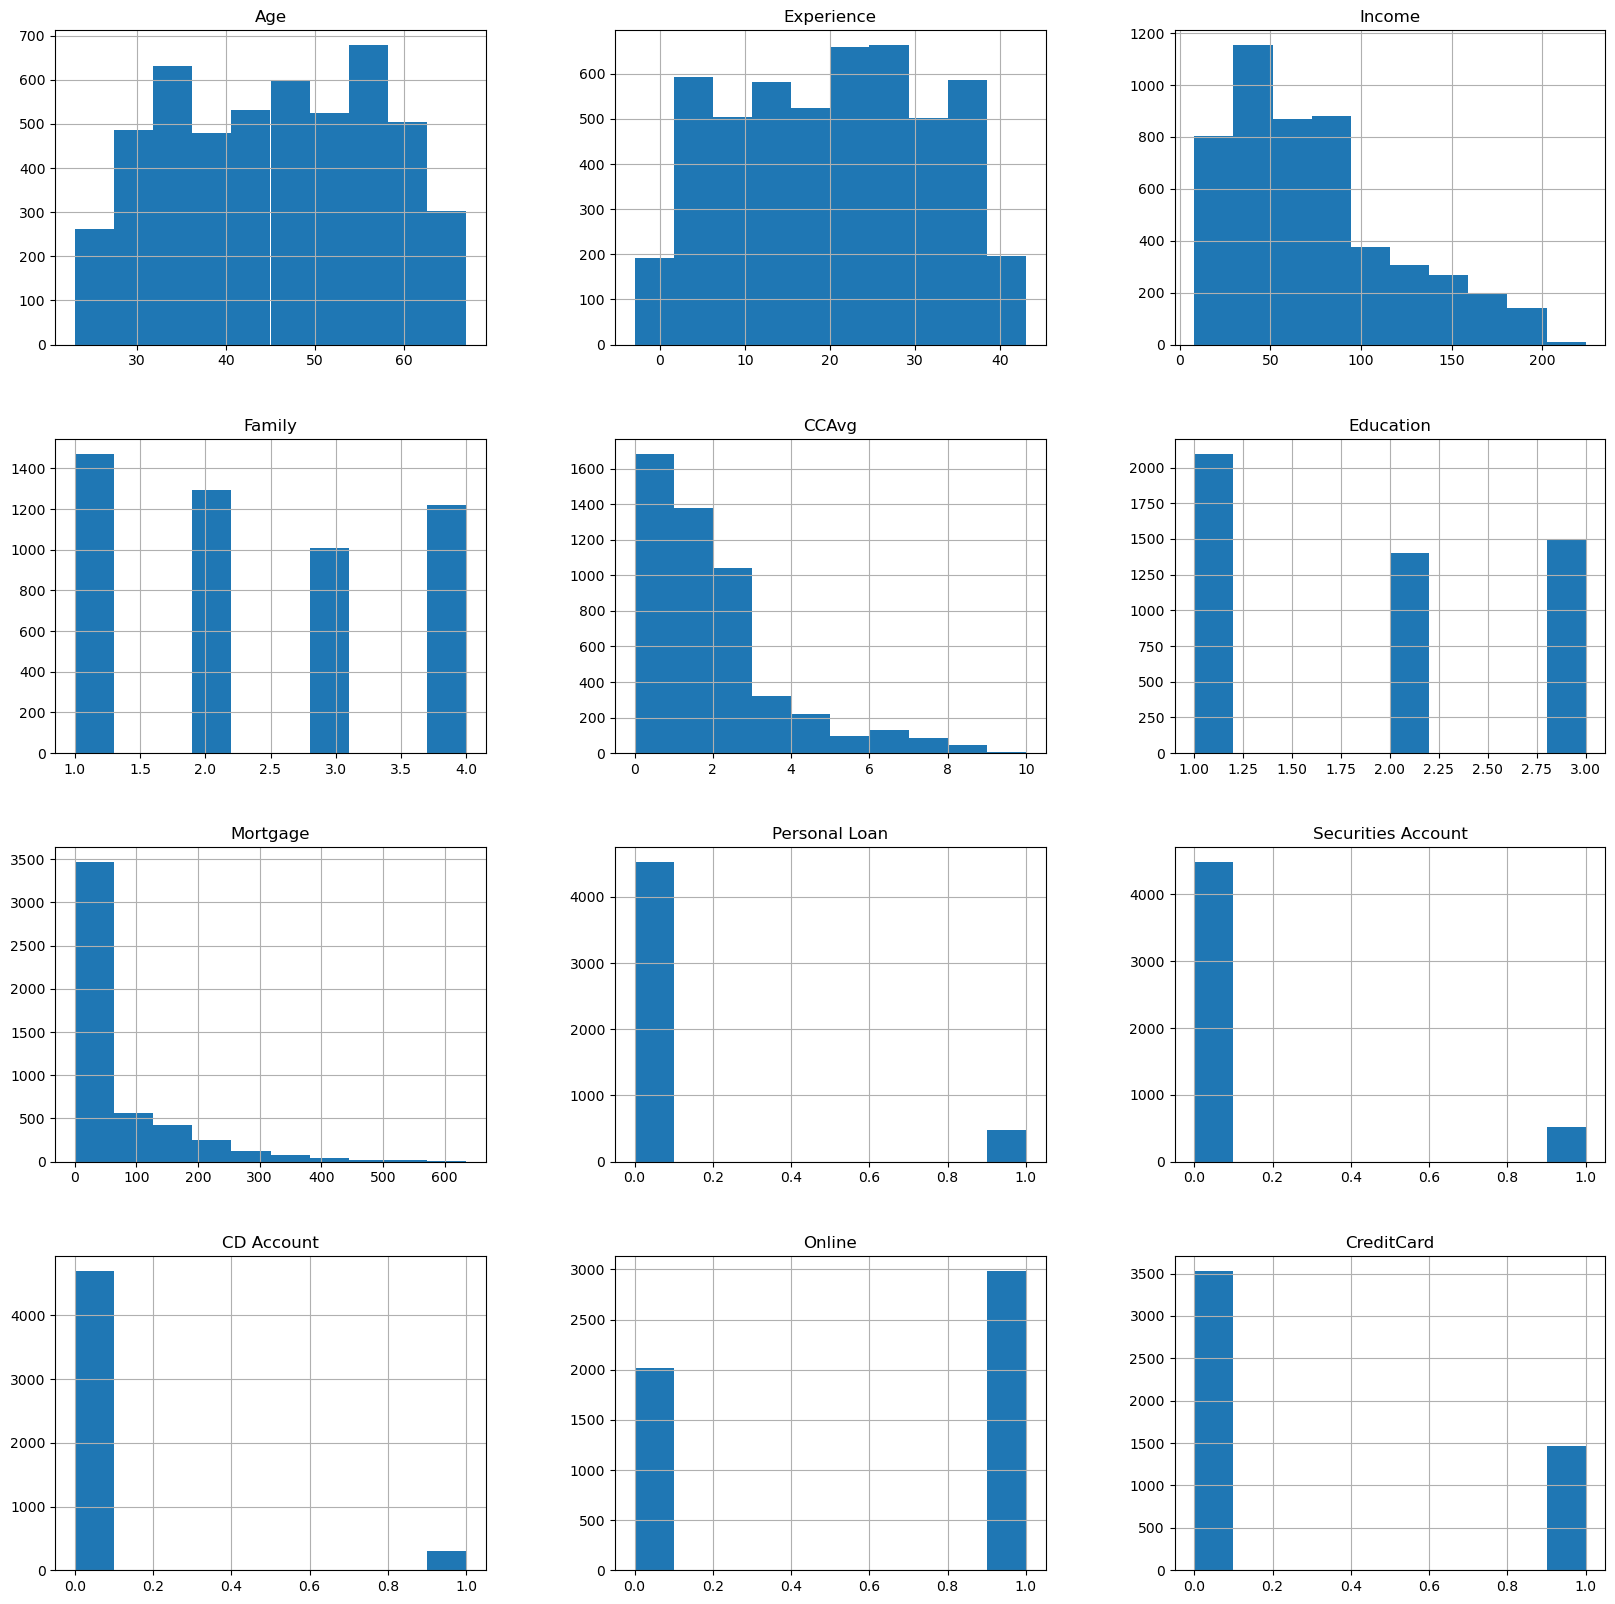

In [21]:
df.hist(figsize=(20,20))

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\4088753809.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

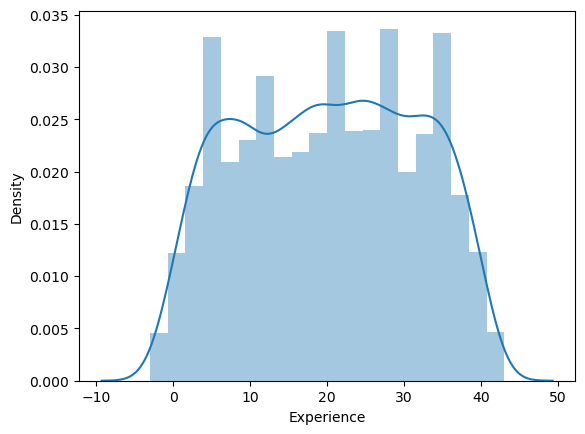

In [22]:
sns.distplot(df['Experience'])

In [23]:
df['Experience'].mean()

20.1046

In [27]:
negative_exp = df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [32]:
negative_exp.shape

(52, 12)

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\3268055496.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

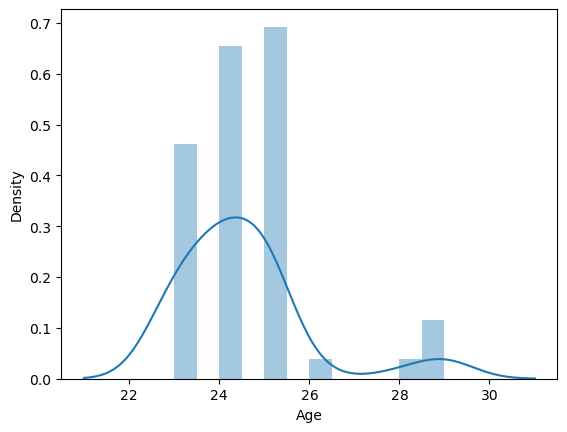

In [35]:
sns.distplot(negative_exp['Age'])

In [36]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [37]:
negative_exp.size

624

In [40]:
print('There are {} records which has negative values for experience, approx {} %'.format(negative_exp.size , 
                                ((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [41]:
data = df.copy()

In [42]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [44]:
data.shape

(5000, 12)

In [47]:
data['Experience'] = np.where(data['Experience'] < 0,
                             data['Experience'].mean(),
                             data['Experience'])

In [48]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [49]:
## No negative data

In [50]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048719,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048719,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018097,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\3161682655.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

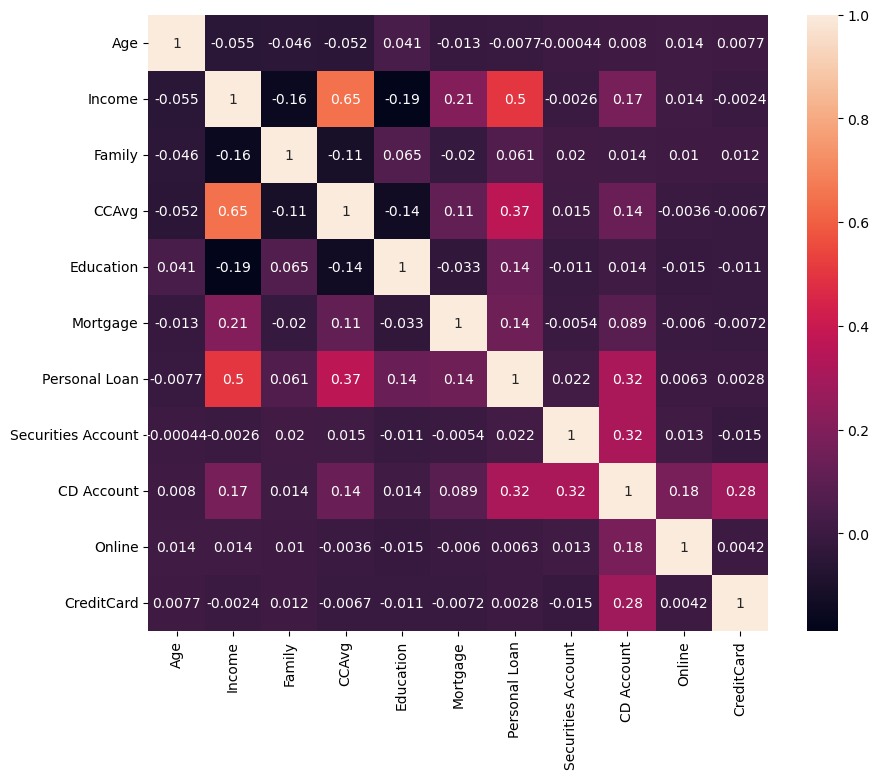

In [102]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True)

In [57]:
### Conclusion : 
# Here it is observed there is maximum correlation present between age and experience. 
# from bank loan giving capability, age is more important than experience factor

In [60]:
data = data.drop(['Experience'], axis = 1)

In [61]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


### Analysis on Education column 

In [62]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

#### Converting into categorical data

In [63]:
def experience(x):
    if x == 1:
        return "UG"
    if x == 2:
        return "PG"
    if x == 3:
        return "Professional"

In [64]:
data['current_edu'] = data['Education'].apply(experience)

In [65]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,current_edu
0,25,49,4,1.6,1,0,0,1,0,0,0,UG
1,45,34,3,1.5,1,0,0,1,0,0,0,UG
2,39,11,1,1.0,1,0,0,0,0,0,0,UG
3,35,100,1,2.7,2,0,0,0,0,0,0,PG
4,35,45,4,1.0,2,0,0,0,0,0,1,PG


In [67]:
education_dis = data.groupby('current_edu')['Age'].count()
education_dis

current_edu
PG              1403
Professional    1501
UG              2096
Name: Age, dtype: int64

In [72]:
fig = ps.pie(data, values = education_dis, names = education_dis.index, title = 'pie chart based on Education level')
fig.show()

### Analysis on Income Column

In [82]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [83]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [84]:
def security(y):
    if (y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities and Deposits"
    if (y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Security and Deposit Account"
    if (y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Security account"
    if (y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only Deposite account"

In [85]:
data['Account_holder_categoty'] = data.apply(security, axis = 1)

In [86]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,current_edu,Account_holder_categoty
0,25,49,4,1.6,1,0,0,1,0,0,0,UG,Holds only Security account
1,45,34,3,1.5,1,0,0,1,0,0,0,UG,Holds only Security account
2,39,11,1,1.0,1,0,0,0,0,0,0,UG,Does not hold Security and Deposit Account
3,35,100,1,2.7,2,0,0,0,0,0,0,PG,Does not hold Security and Deposit Account
4,35,45,4,1.0,2,0,0,0,0,0,1,PG,Does not hold Security and Deposit Account


In [87]:
values = data['Account_holder_categoty'].value_counts()
values.index

Index(['Does not hold Security and Deposit Account',
       'Holds only Security account', 'Holds only Deposite account',
       'Holds Securities and Deposits'],
      dtype='object')

In [88]:
fig = ps.pie(data, values = values, names = values.index, title = 'pie chart based on Account holding type')
fig.show()

### Multivariate Analysis

In [89]:
ps.box(data, x = 'Education', y = 'Income',facet_col = 'Personal Loan' )

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\201519368.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Income', ylabel='Density'>

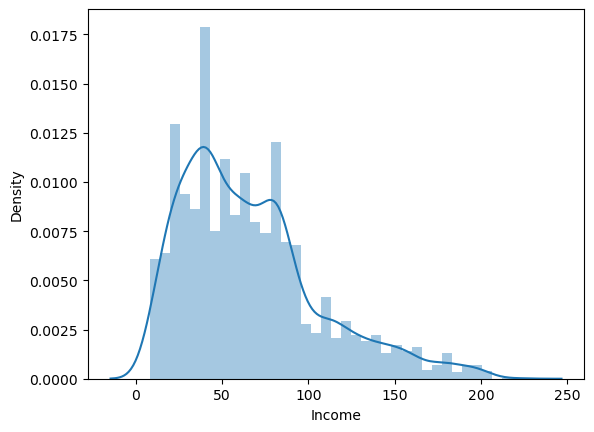

In [90]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'])

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\3331667565.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Income', ylabel='Density'>

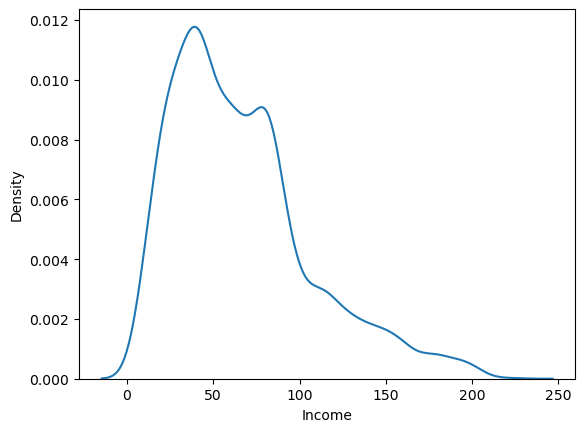

In [91]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False)

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\3799979311.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Income', ylabel='Density'>

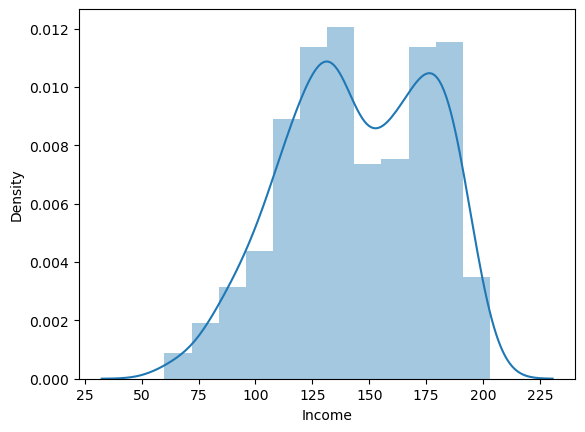

In [93]:
sns.distplot(data[data['Personal Loan'] == 1]['Income'])

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\1573981905.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\1573981905.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




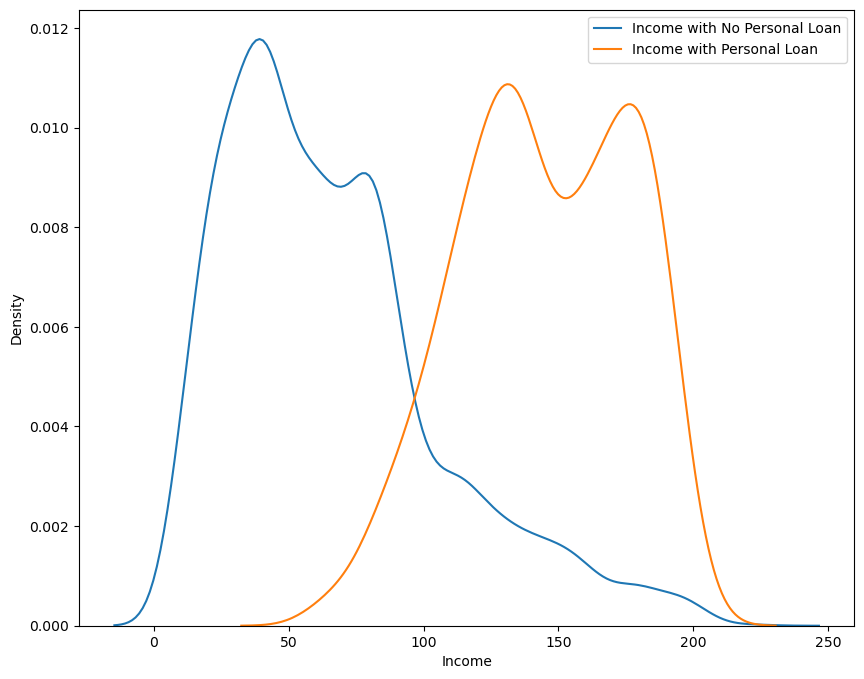

In [103]:
plt.figure(figsize=(10,8))
sns.distplot(data[data['Personal Loan'] == 0]['Income'],hist = False, 
             label =  "Income with No Personal Loan")
sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False, 
             label =  "Income with Personal Loan")
plt.legend()

In [115]:
def plot(col1, col2, label1, label2, title):
    sns.distplot(data[data[col2] == 0][col1],hist = False, 
             label =  label1)
                           
    sns.distplot(data[data[col2] == 1][col1],hist = False, 
             label =  label2)
    plt.legend()
    #plt.title(title)                 
                           

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\135492409.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\135492409.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




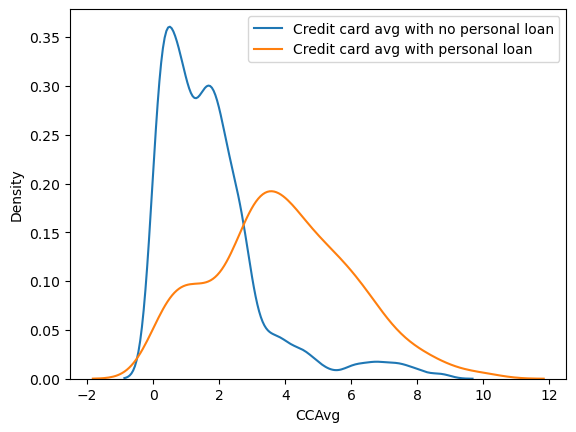

In [113]:

plot('CCAvg','Personal Loan',
     'Credit card avg with no personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')

In [114]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'current_edu', 'Account_holder_categoty'],
      dtype='object')

In [124]:
col = ['Securities Account',
      'Online',
      'CreditCard']

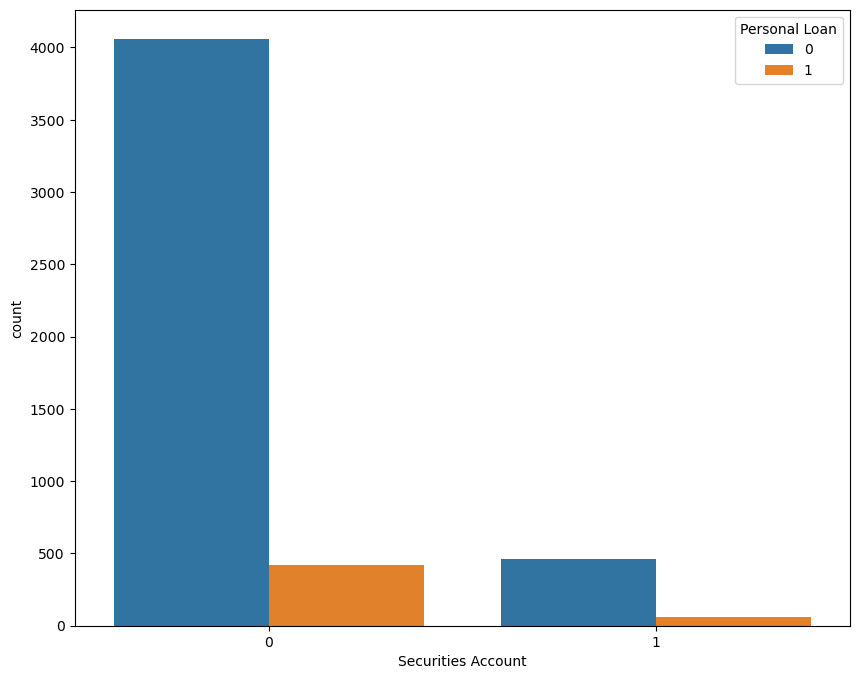

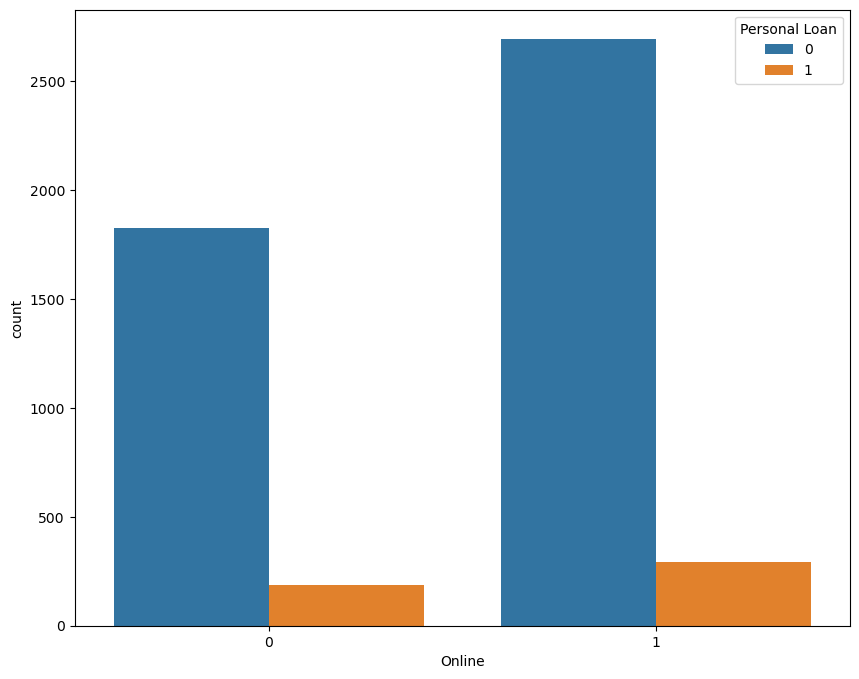

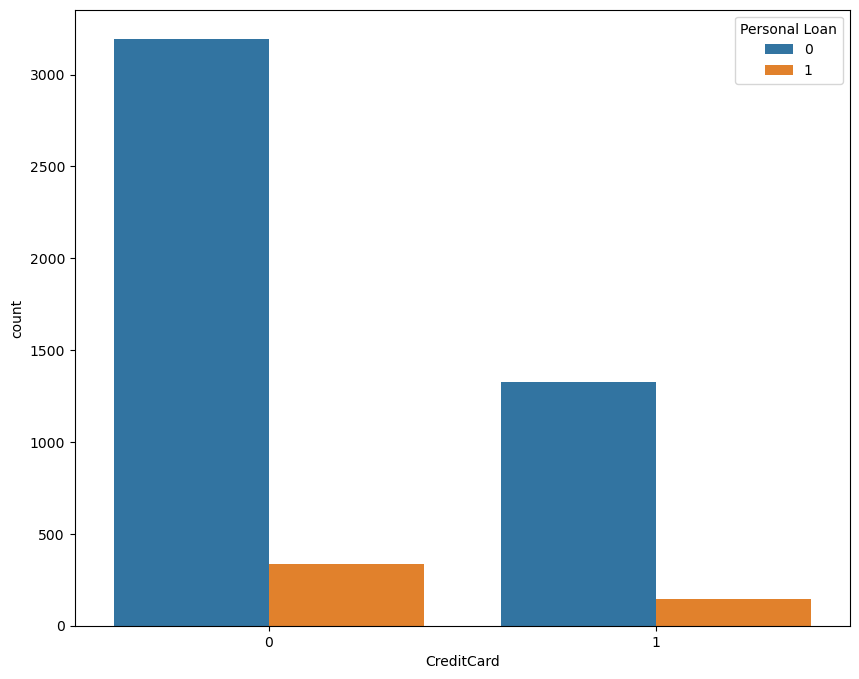

In [123]:
for i in col:
    plt.figure(figsize=(10,8))
    sns.countplot(x = i, data = data, hue ='Personal Loan')

### Handling Skewness

In [126]:

from scipy.stats import zscore

In [128]:
# using IQR 

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

IQR = q3 - q1
print(IQR)

Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\1778034385.py:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\1778034385.py:4: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [129]:
# using Log Normal Transform 

data_1 = data[['Income', 'CCAvg']]
data_1 = np.log(data_1 + 1)
data_1

,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465


### Using Power Transformer 

In [130]:
from sklearn.preprocessing import PowerTransformer

C:\Users\Subham Chakraborty\AppData\Local\Temp\ipykernel_4660\1470636686.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




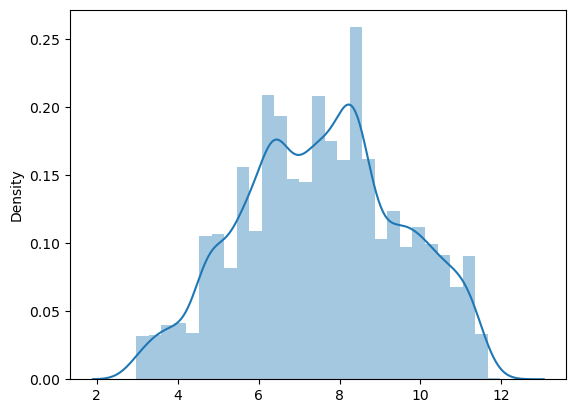

In [131]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
Income = pt.transform(data['Income'].values.reshape(-1,1))
sns.distplot(Income)
plt.show()

In [132]:
# Now data is apparently looking normally distributed 